# Homework 1

**DUE OCT 19th by 11:59PM**

Homework 1 is done in Jupyter Notebook to give you a chance to familiarize yourself to this powerful tool for data analysis. 

In Jupyter Notebook, codes and texts are executed in cells. Texts are written in Markdown cell, as you can see in the homework instructions below. Codes are written in code cells. Cells are run one at a time. You can change the cell type by navigating to Cell -> Cell Type.

There are spaces for you to enter your answers to the questions, either in code or text. Feel free to add more cells if you need (likely).

In many parts, some Scikit-learn functions and classes have already been imported to give you leads on what you may need to use. You still need to refer to the Scikit-learn documentation to learn how the classes and methods work. You can use other publicly available libraries and packages if you want, as long as they finish the work. 

You are expected to turn in a **pdf version** of this notebook with all your **codes, results, and figures**. Make sure the figures and results are visible as you want them to appear in the pdf before turning it in. Please do not modify the instructions as doing so will limit our ability to follow and grade your answers.

## Problem 1

Increase your familiarity with Github. This problem needs to be finished with a partner. Follow these steps to finish the problem:

1.   Create a github account.
2.   Create a public repository and push a helloworld.py file.
3.   Person $A$ forks Person $B$'s repo and modifies the file, then pushes to their own fork and finally creates a pull request for person B to merge.
4.   Person $B$ reviews and merges the pull request.
5.   Do the same for $A$ and $B$ reversed.

My Repo: https://github.com/yuuknowwhoitis/PSTAT197_hw1  
Allison Yih's Repo: https://github.com/allison1025/190hw1

## Problem 2

In this problem, you will consider solving the least-squared problem in two different approaches, one using Gradient Descent and the other using the formula. After that, you will compare the results you get from both approaches.

a) Load the 1-D data and the labels from **'linear_regression.csv'**. The first column contains the data values and the second column contains the labels. Store the data in a variable ***X***. Similarly, store the labels in a variable ***y***.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
linear_reg = pd.read_csv('linear_regression.csv', header=None)
X = linear_reg.iloc[:,0].values.reshape(-1,1)
y = linear_reg.iloc[:,1]

b) Fit a linear regression model, in the form $Ax + b$, using the formula. Print out the parameters $A$ and $b$.

In [3]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X,y)
A = reg.coef_[0]
A

7.526346995925662

In [4]:
b = reg.intercept_
b

0.20313216364663322

Visualize your result in a 2-D plot. Your plot should show the data points and the line $Ax + b$.

[325.30188729]


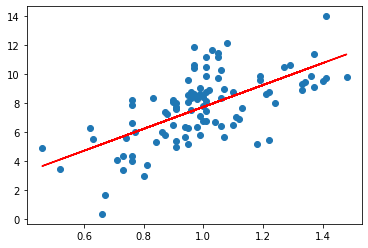

In [5]:
plt.scatter(X, y)
plt.plot(X, A*X + b, 'red')

error = 0
for i in range(1, len(X)):
    error = error + (y[i-1] - (A*(X[i-1]) + b))**2
print(error)

c) Now, fit a linear regression model using Gradient Descent. Print out the parameters $A$ and $b$.

In [6]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

fit = SGDRegressor().fit(X,y)
A_new = fit.coef_
b_new = fit.intercept_

In [7]:
A_new

array([4.46345944])

In [8]:
b_new

array([3.30717811])

Visualize your result in a 2-D plot similar to that in part **b**. Compare your results from both parts.

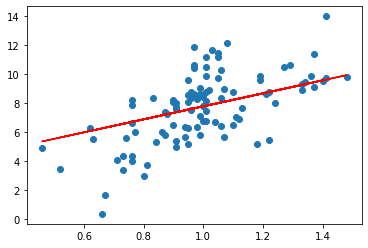

[365.52618521]


In [9]:
plt.scatter(X, y)
plt.plot(X, A_new*X + b_new, 'red')
plt.show()

error = 0
for i in range(1, len(X)):
    error = error + (y[i-1] - (A_new*(X[i-1]) + b_new))**2
print(error)

## Problem 3

In this problem, you will train classifiers using two widely used algorithms, Support Vector Machine (SVM) and Random Forest (RF). You will train and fine-tune each model using cross-validation (CV). After that, you will compare the performance of SVM and RF for this problem.

a) A 13-D dataset with labels is given in **'wine.csv'**. The last column contains the labels. Store the data and the labels in variables ***X*** and ***y***, respectively.

In [10]:
wine = pd.read_csv('wine.csv', header = None)
X = wine.iloc[:,0:13]
y = wine.iloc[:,13]

Split the data into a train set and a test set. The size of the train set is 90% of the dataset.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 50)

b) Find a good SVM model by performing 10-fold CV on the train set. Try different set of model parameters and record the resulting model performance during CV. Print out your best model's parameters and its performance (accuracy).

In [12]:
# A few methods to get you started with CV. 
# You are encouraged to look into the model_selection module of Scikit-learn to find tools that best fit your need.
from sklearn.model_selection import StratifiedKFold, GridSearchCV, ParameterGrid
from sklearn.svm import SVC

params = {'C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100]}
svc = SVC(kernel="linear", gamma="auto")

model = GridSearchCV(svc, params, cv = 10)
model.fit(X_train, y_train)

cvscore = model.cv_results_['mean_test_score']
print(cvscore)
print("C: ", model.best_params_)
print("CV Score:", model.best_score_)

[0.79375 0.93125 0.975   0.9625  0.95625 0.95625 0.95625 0.95625]
C:  {'C': 0.1}
CV Score: 0.975


Now train your best SVM model on the whole train dataset and test it on the test set. Print out your model's performance.

In [13]:
from sklearn.metrics import accuracy_score

svm_model = SVC(C = 0.1, kernel = "linear", gamma = "auto")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9444444444444444

c) Similarly, find a good RF model by performing 10-fold CV on the train set. Print out your best model's parameters and its performance (accuracy).

In [14]:
from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators': [1, 10, 50, 100, 1000], 'criterion' : ["gini", "entropy"]}
rf = RandomForestClassifier()
model = GridSearchCV(rf, params, cv = 10)
model.fit(X_train, y_train)

cvscore = model.cv_results_['mean_test_score']
es = model.cv_results_['param_n_estimators']
crits = model.cv_results_['param_criterion']
d = {'estimators': es, 'criterion': crits, 'score': cvscore}
cvdf = pd.DataFrame(data=d).sort_values(by='score', ascending = False)
print(cvdf.head())
print('n_estimators = 50\ncriterion = gini\n CV Score = 0.98125')

  estimators criterion   score
2         50      gini  0.9875
8        100   entropy  0.9875
1         10      gini  0.9750
3        100      gini  0.9750
4       1000      gini  0.9750
n_estimators = 50
criterion = gini
 CV Score = 0.98125


Test your best RF model on the test set. Print out your model's performance.

In [15]:
model = RandomForestClassifier(n_estimators = 10, criterion  = 'gini')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9444444444444444

d) Compare the 2 models. Why do we need CV?

CV is needed because we are tuning the hyperparameters in each model. CV is needed to make sure 

## Problem 5

What is the hypothesis space for problems 1-3? What are the pros and cons of having a large hypothesis space? 

**Problem 1:** No hypothesis space    

**Problem 2:**  The hypothesis space is the set of all the possible regression lines that span from the $R^2$ space.

**Problem 3:**  The hypothesis space for the support vector machine model is the set of all hyperplanes that can be constructed in the 12d space, since our dataset has 13 variables. The random forest model has a hypothesis space of all possible forests that can be made.  

**Pros:**  
- Many possible output functions, so there's also many possible insights to learn

**Cons:**  
- Large space makes it hard to predict solution
- Computationally intensive

## Problem 6

Suppose we find the best binary classifier for a set of red points and another binary classifier for a set of blue points. Now, suppose we are given a new set of $R$ red and $B$ blue points that we can predict to be positive or negative. If we have to choose a subset of $k$ positive points from $R$ union $B$, what would be fair way for choosing. 

You are given a red dataset in 'R.csv' and a blue dataset in 'B.csv'. There is also a third test dataset in 'RBtest.csv'.

a) Load the datasets. All datasets are 2-D with the last column containing the labels. 

In [33]:
R = pd.read_csv('R.csv', header=None)
B = pd.read_csv('B.csv',header=None)
RBtest = pd.read_csv('RBtest.csv', names = ['X1','X2','Y'])

R_X = R.iloc[:, 0:2]
R_y = R.iloc[:,2]
B_X = B.iloc[:, 0:2]
B_y = B.iloc[:,2]

RBtest_X = RBtest.iloc[:, 0:2]
RBtest_y = RBtest.iloc[:, 2]

b) Train 2 classifiers, one for the red dataset and the other for the blue dataset. You are free to choose the learning algorithm. 

In [37]:
RB = pd.concat([R, B])
RB_X = RB.iloc[:, 0:2]
RB_y = RB.iloc[:, 2]

params = {'C': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100]}
svc = SVC(kernel='linear', gamma='auto')

model = GridSearchCV(svc, params, cv = 10)
model.fit(RB_X, RB_y)

cvscore = model.cv_results_['mean_test_score']
print(cvscore)
print("C: ", model.best_params_)
print("CV Score:", model.best_score_)

[0.53125  0.8625   0.859375 0.859375 0.859375 0.85     0.85     0.85    ]
C:  {'C': 0.01}
CV Score: 0.8625


In [39]:
svc = SVC(kernel="linear", gamma="auto")
model_R = SVC(C=0.01,kernel='linear', gamma='auto').fit(R_X, R_y)
model_B = SVC(C=0.01,kernel='linear', gamma='auto').fit(B_X, B_y)

c) Now use your models to classify instances in the test dataset. The models may agree on many points but may also disagree on many other points. Let's call the set of positive points classified by the red model $P_r$ and the set of positive points classified by the blue model $P_b$. You are asked to pick out $k$ points from the set $P_r \cup P_b$. What is a fair way to do this. Demonstrate your answer with code and visualizations. 

In [46]:
from sklearn.metrics import accuracy_score

R_pred = model_R.predict(RBtest_X)
B_pred = model_B.predict(RBtest_X)

R_accuracy = accuracy_score(RBtest_y, R_pred)
B_accuracy = accuracy_score(RBtest_y, B_pred)

In [47]:
R_accuracy

0.675

In [48]:
B_accuracy

0.9

In [51]:
R_ratio = R_accuracy/(R_accuracy + B_accuracy)
B_ratio = B_accuracy/(R_accuracy + B_accuracy)

In [61]:
R_ratio*160

68.57142857142857

In [59]:
R.sample(frac=R_ratio)

,0,1,2
41,-0.41,-0.63,0
150,0.76,1.24,0
65,0.71,1.74,0
80,0.69,1.57,1
5,0.34,0.25,1
...,...,...,...
1,-1.20,-0.25,0
18,-0.66,-0.38,0
110,1.67,1.49,1
86,2.04,2.06,1


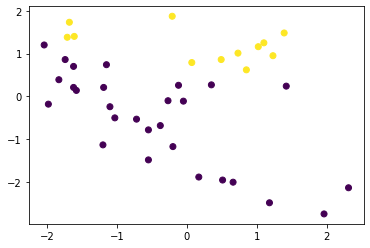

In [24]:
P_r = model_R.predict(RBtest_X)
P_b = model_B.predict(RBtest_X)

plt.scatter(RBtest_X.iloc[:,0], RBtest_X.iloc[:,1], c=P_r)

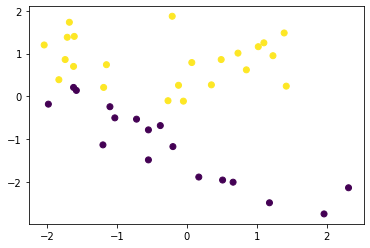

In [25]:
plt.scatter(RBtest_X.iloc[:,0], RBtest_X.iloc[:,1], c=P_b)